Hello world of ML. Demonstrate that ML algorithm can be used as linear regression. 
1. Generate a feature vector of length 10 sampled randomly from Uniform distribution (x)
2. The target variable is related to the features as y=beta_0+beta_1*x, where beta_0=1 and beta_1=2
3. It was observed that the target variable contains noise sampled from Gaussian distribution with mean and standard deviation = 2 and 1 respectively (noise)
4. Using regression library fit the noisy target variable to features and determine the coefficients
5. Using ML algorithm fit the noisy target variable to features and determine the coefficients
6. Compare the results and make your comments
7. Using 4 and 5 find the target value given feature is 6. Do you see any discrepencienices in results ?


In [1]:

# import libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


 Linear regression 

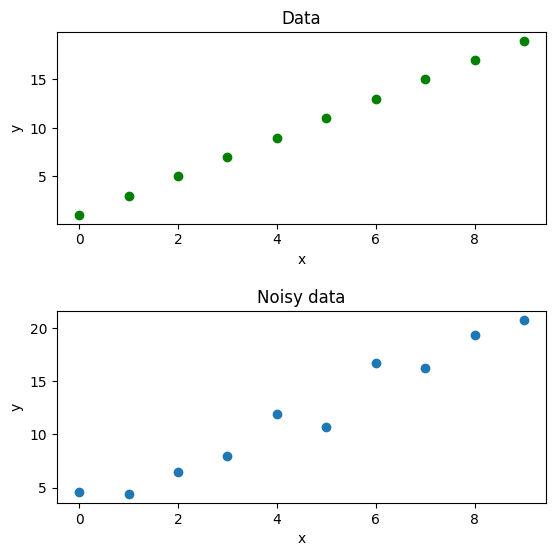

In [3]:
#creat data set - features and (noisy) target variables
%matplotlib inline


num_sample=10
x=np.array([np.arange(0,num_sample)]) # x values 10 samples - the shape is 1x10 Feature vector 
x=x.T # x is feature so must be in rows 10x1 samples (instance)

#parameters slope and intercept \theta=[m,c] to be learnt
beta1=2.0 # slope m 
beta0=1.0 #intercept c 
y=np.dot(x,beta1)+beta0 #10x1 y=beta_0x+beta1

#add some noise in the data
np.random.seed(1) # generates same random number
mu, sigma = 2, 1 #mean and variance of Gaussian noise
noise=np.array([np.random.normal(mu, sigma, num_sample)]) #1x10
noise=noise.T #10x1

y_noisy=y+noise #noisy y data 1x10

# plot data
fig, axs = plt.subplots(2, figsize=(6,6))
axs[0].scatter(x,y, color='green')
axs[0].set_title('Data')
axs[1].scatter(x,y_noisy)
axs[1].set_title('Noisy data')
fig.tight_layout(pad=3.0)
                    
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')



The slope (beta1) is : 1.96 
 intercept (beta0) is:  3.07 
 score: 0.96 


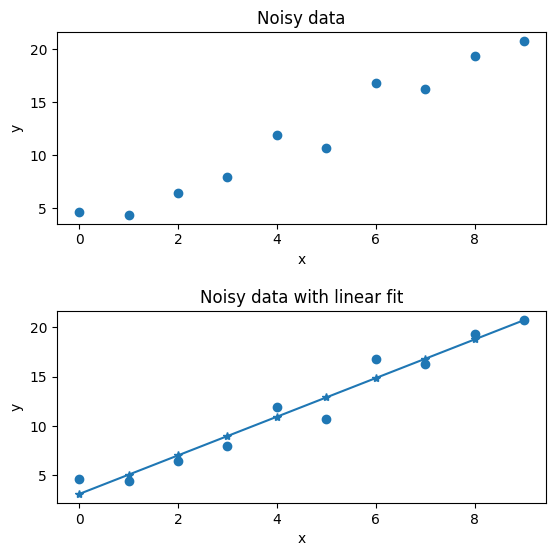

In [4]:
#create a liner regression model
linear_fit = LinearRegression().fit(x,y_noisy) # this function takes input of same dimension so make both 1x10
beta1_hat=linear_fit.coef_ # is 2D as the data are forced to convert to 2D in form of matrix
beta0_hat=linear_fit.intercept_

r_sq=linear_fit.score(x,y_noisy) # higher the better

print("The slope (beta1) is :{: .2f} \n intercept (beta0) is: {: .2f} \n score: {:.2} " 
      .format(beta1_hat[0][0], beta0_hat[0],r_sq))

# fitted line
beta1_hat=beta1_hat[0][0]
beta0_hat=beta0_hat[0]
#y_noisy_hat=np.dot(x,beta0_hat)+beta1_hat

y_noisy_hat=linear_fit.coef_*x+linear_fit.intercept_ #y=beta_1x+beta0


# plot 
fig, axs = plt.subplots(2, figsize=(6,6))
axs[0].scatter(x,y_noisy)
axs[0].set_title('Noisy data')
axs[1].scatter(x,y_noisy)
axs[1].plot(x,y_noisy_hat, '-*')
axs[1].set_title('Noisy data with linear fit')
fig.tight_layout(pad=3.0)
                    
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

    


Machine learning

In [ ]:
# Can we learn the parameter using ML

# Define layer. Single perceptron that take one sample as input
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1])


model=tf.keras.Sequential([layer0])



# Compile model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

# Train the model
EPOCHS=100
history = model.fit(x, y_noisy, epochs=EPOCHS, verbose=True)#verbose=False, if do not want to see the epoch and evolution of weights

#model summary
model.summary()

#%%
#check  parameters - loss 
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)


#loss
plt.figure()
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

# Prediction
print('Prediction: {}'.format(model.predict([6.0])))

# Get weight and bias
para = layer0.get_weights()
print('weight (beta1): {} bias(beta0): {}'.format(para[0], para[1]))

#model prediction 
y_noisy_hat_ml=x*para[0]+para[1] # find weights and bias and compare with ground truth
y_noisy_hat_ml_1=model.predict(x) # This is widely used

# plot 
fig, axs = plt.subplots(2, figsize=(6,6))
axs[0].scatter(x,y_noisy) # noisy data
axs[0].set_title('Noisy data')
axs[1].scatter(x,y_noisy, label='noisy data') # noisy data
axs[1].plot(x,y_noisy_hat,'-*', label='linear fit')# linear fitting
axs[1].plot(x,y_noisy_hat_ml, '--g', label='ML_wb') # ML using weight and bias
axs[1].plot(x,y_noisy_hat_ml_1, '--k', label='ML_pred') # ML using model.predict
# axs[1].plot(x,y, '--s', label='data without noise') # data without noise
axs[1].set_title('Parameter estimation')
fig.tight_layout(pad=3.0)
                    
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
leg = ax.legend(loc ="lower right");

In [ ]:
print('Model predcition using ML \n: {}'.format(y_noisy_hat_ml_1)) # prediction from ML
print(' \n Model predcition using linear regression \n: {}'.format(y_noisy_hat))

In [ ]:
loss_fitting=np.square(y_noisy-y_noisy_hat)
loss_ml=np.square(y_noisy-y_noisy_hat_ml_1)

plt.plot(loss_fitting, '-r', label='loss_fitting')
plt.plot(loss_ml, '--g', label='loss_ml')
plt.legend(loc="upper right")
plt.xlabel('Data index')
plt.ylabel('Loss')
plt.show()
